# 데이터 불러오기

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from category_encoders import OneHotEncoder, OrdinalEncoder


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

from pdpbox.pdp import pdp_isolate, pdp_plot
import eli5
from eli5.sklearn import PermutationImportance


In [6]:
df = pd.read_csv('/Users/yeseulseo/Section2/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [7]:
df['Churn'].value_counts(normalize=True)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

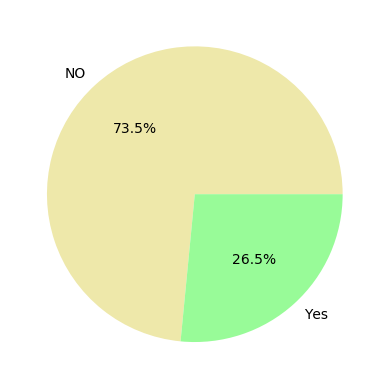

In [8]:
plt.pie(df['Churn'].value_counts(normalize=True),labels=['NO',"Yes"], autopct='%.1f%%',colors=["palegoldenrod","palegreen"])
plt.show()

# 중복 ID 검사

In [9]:
def analysis_on_features(df):
    duplicated_rows = 0
    dupli = df.duplicated(subset=['customerID'])
    for i in dupli.index:
        if dupli[i] == True:
            duplicated_rows += 1
            print(i)
    return duplicated_rows

In [10]:
data_duplicated_rows = analysis_on_features(df)
print('데이터의 중복열 개수는 {}개 이다.' .format(data_duplicated_rows))

데이터의 중복열 개수는 0개 이다.


# 결측치 확인

In [11]:
def check_missing_col(df):
    missing_col = []
    counted_missing_col = 0
    for i, col in enumerate(df.columns):
        missing_values = sum(df[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            counted_missing_col += 1
            print("f결측치가 있는 컬럼은: {col}입니다.")
            print(f"해당 컬럼에 총 {missing_values}개의 결측치가 존재합니다.")
            missing_col.append([col, df[col].dtype])
        
    if counted_missing_col == 0:
        print("결측치가 존재하지 않습니다.")
    return missing_col

In [12]:
missing_col = check_missing_col(df)

결측치가 존재하지 않습니다.


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [14]:
# 타겟의 No와 Yes는 각각 0과 1로 바꾸고 
# 데이터에서 CustomerID의 중복이 없으니 CustomerID의 컬럼은 삭제를 진행.
target_replace = {'Churn' : {'No':0, 'Yes':1}}
df = df.replace(target_replace)
df = df.drop(['customerID'], axis=1)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,0
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,0
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,1


In [15]:
colunm_no=['MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
for i in colunm_no:
    replace1 = {i : {'No internet service':'No'}}
    df = df.replace(replace1)
replace2 = {'MultipleLines' : {'No phone service':'No'}}
df = df.replace(replace2)

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [16]:
for i in colunm_no:
    print( df[i].value_counts())

No     4072
Yes    2971
Name: MultipleLines, dtype: int64
No     5024
Yes    2019
Name: OnlineSecurity, dtype: int64
No     4614
Yes    2429
Name: OnlineBackup, dtype: int64
No     4621
Yes    2422
Name: DeviceProtection, dtype: int64
No     4999
Yes    2044
Name: TechSupport, dtype: int64
No     4336
Yes    2707
Name: StreamingTV, dtype: int64
No     4311
Yes    2732
Name: StreamingMovies, dtype: int64


# 데이터 나누기

In [17]:
def split(df, target):
    X = df.drop([target], axis=1)
    y = df[target]

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_val, y_train, y_val

In [18]:
# trian / test 나누기
X_train, X_test, y_train, y_test = split(df, 'Churn')

In [19]:
print("X_train의 형태: ", X_train.shape, " y_train의 형태: ", y_train.shape)
print("X_test의 형태: ", X_test.shape, " y_test의 형태: ", y_test.shape)

X_train의 형태:  (5634, 19)  y_train의 형태:  (5634,)
X_test의 형태:  (1409, 19)  y_test의 형태:  (1409,)


# Encoder (One-Hot Encoder, OrdinalEncoder)

In [20]:
encoder = OneHotEncoder(cols=['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies'],  use_cat_names=True)
encoder2 = OrdinalEncoder()

X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

X_train_encoded = encoder2.fit_transform(X_train_encoded)
X_test_encoded = encoder2.transform(X_test_encoded)

print("train데이터 형태:")
print(X_train_encoded.shape, y_train.shape, '\n')
print("test데이터 형태:")
print(X_test_encoded.shape, y_test.shape)


train데이터 형태:
(5634, 31) (5634,) 

test데이터 형태:
(1409, 31) (1409,)


# Model

## BaseModel (기준모델)

분류모델이므로 기준모델은 최빈값

In [21]:
basemodel_predict = [df['Churn'].mode()[0]]*len(X_test)
basemodel_f1_score = f1_score(y_test, basemodel_predict)
basemodel_acc = accuracy_score(y_test, basemodel_predict)

print("BaseModel:  f1 score: ", basemodel_f1_score, "/ accuracy: ", basemodel_acc)

BaseModel:  f1 score:  0.0 / accuracy:  0.7352732434350603


## LogisticRegression 

In [22]:
model = LogisticRegression(class_weight='balanced', n_jobs=-1, random_state=42)

In [23]:
model.fit(X_train_encoded, y_train)

/Users/yeseulseo/miniforge3/envs/CP2/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', n_jobs=-1, random_state=42)

In [24]:
pred = model.predict(X_test_encoded)
f1 = f1_score(y_test, pred)
acc = accuracy_score(y_test, pred)

print("LogisticRegression:  f1 score: ", f1, "/ accuracy: ", acc)

LogisticRegression:  f1 score:  0.6272545090180361 / accuracy:  0.7359829666430092


## RandomForestClassifier

In [25]:
model2 = RandomForestClassifier(class_weight= 'balanced', oob_score=True, n_jobs=-1, random_state=42)

In [26]:
model2.fit(X_train_encoded, y_train)

RandomForestClassifier(class_weight='balanced', n_jobs=-1, oob_score=True,
                       random_state=42)

In [27]:
pred2 = model2.predict(X_test_encoded)
f1_RF = f1_score(y_test, pred2)
acc_RF = accuracy_score(y_test, pred2)

print("RandomForestClassifier:  f1 score: ", f1_RF, "/ accuracy: ", acc_RF)

RandomForestClassifier:  f1 score:  0.5390749601275918 / accuracy:  0.794889992902768


분류모델이므로Basemodel과 LogisticRegression, RandomForestClassifer를 비교하면,
LogisticRegression, RandomForestClassifer 두 모델이 모두 기준모델보다 정확도 f1 score이 더 높게 나왔다.

LogisticRegression, RandomForestClassifer 의 성능을 비교해보면
F1 score은 LogisticRegression 약 0.09 더 높게 나왔고,
정확도는 RandomForestClassifer 약 0.06 더 높게 나왔다. 
평가지표를 F1 score로 하기로 결정하였기때문에 
두 모델 중 LogisticRegression 모델의 하이퍼 파라미터튜닝르 진행하였다.

## 하이퍼파라미터 튜닝 (LogisticRegression)
StratifiedKFold : 불균형한 분포도를 가진 레이블 데이터 집합을 위한 KFold 방식입니다.  
**StratifiedKFold**를 통한 교차검증 (K=5) 

In [28]:
# 파이프라인 구축
LR_model = Pipeline([
    ('LR', LogisticRegression(class_weight='balanced', n_jobs=-1, random_state=42))
])

# 랜덤서치CV -> cv=5 (하이퍼 파라마미터튜닝의 반복 횟수는 5*30=150)
dists_LR = {
    'LR__penalty' : ['l1', 'l2'],
    'LR__C': [0.01 ,0.05, 0.5, 1.0, 2.0, 3.0],
    'LR__solver': ['lbfgs', 'liblinear', 'saga'],
    'LR__max_iter' : [100, 150, 200, 300]
}

clf_LR = RandomizedSearchCV(
    LR_model,
    param_distributions = dists_LR,
    n_iter=30,
    cv=5,
    scoring = 'accuracy',
    random_state=42
)

In [29]:
# 5개의 폴드 세트를 분리하여 각 폴드 세트별 튜닝된 모델 저장
skf = StratifiedKFold(n_splits=5)
cv_model = []


In [30]:
# train, test 나누지 않은 전체 데이터에서 인코더 진행.
features = df.drop(['Churn'], axis=1)
features_encoded = encoder.fit_transform(features)
features_encoded = encoder2.fit_transform(features_encoded)

target = df['Churn']

In [31]:
n_iter = 0
for train_idx, test_idx in skf.split(features_encoded, target):
    n_iter += 1
    X_train, X_test = features_encoded.iloc[train_idx], features_encoded.iloc[test_idx]
    y_train, y_test = target.iloc[train_idx], target.iloc[test_idx]
    clf_LR.fit(X_train, y_train)
    LR_model = clf_LR.best_estimator_
    cv_model.append(LR_model)
    fold_pred = LR_model.predict(X_test)

    accuracy = np.round(accuracy_score(y_test, fold_pred), 4)
    f1 = np.round(f1_score(y_test, fold_pred), 4)
    print('\n{} 교차검증 정확도: {} / f1 score: {}, 하이퍼파라미터: {} ,학습 데이터 크기: {}, 검증 데이터 크기: {}, ' .format(n_iter, accuracy, f1, clf_LR.best_params_, X_train.shape[0], X_test.shape[0]))

    

    

/Users/yeseulseo/miniforge3/envs/CP2/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/yeseulseo/miniforge3/envs/CP2/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/yeseulseo/miniforge3/envs/CP2/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/yeseulseo/miniforge3/envs/CP2/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/yeseulseo/miniforge3/envs/CP2/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



1 교차검증 정확도: 0.7367 / f1 score: 0.6249, 하이퍼파라미터: {'LR__solver': 'liblinear', 'LR__penalty': 'l2', 'LR__max_iter': 100, 'LR__C': 0.01} ,학습 데이터 크기: 5634, 검증 데이터 크기: 1409, 


/Users/yeseulseo/miniforge3/envs/CP2/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/yeseulseo/miniforge3/envs/CP2/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/yeseulseo/miniforge3/envs/CP2/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/yeseulseo/miniforge3/envs/CP2/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/yeseulseo/miniforge3/envs/CP2/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



2 교차검증 정확도: 0.758 / f1 score: 0.6368, 하이퍼파라미터: {'LR__solver': 'lbfgs', 'LR__penalty': 'l2', 'LR__max_iter': 150, 'LR__C': 0.01} ,학습 데이터 크기: 5634, 검증 데이터 크기: 1409, 


/Users/yeseulseo/miniforge3/envs/CP2/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/yeseulseo/miniforge3/envs/CP2/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/yeseulseo/miniforge3/envs/CP2/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/yeseulseo/miniforge3/envs/CP2/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/yeseulseo/miniforge3/envs/CP2/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



3 교차검증 정확도: 0.7388 / f1 score: 0.6183, 하이퍼파라미터: {'LR__solver': 'liblinear', 'LR__penalty': 'l2', 'LR__max_iter': 100, 'LR__C': 0.01} ,학습 데이터 크기: 5634, 검증 데이터 크기: 1409, 


/Users/yeseulseo/miniforge3/envs/CP2/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/yeseulseo/miniforge3/envs/CP2/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/yeseulseo/miniforge3/envs/CP2/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/yeseulseo/miniforge3/envs/CP2/lib/python3.8/site-packages


4 교차검증 정확도: 0.7457 / f1 score: 0.62, 하이퍼파라미터: {'LR__solver': 'lbfgs', 'LR__penalty': 'l2', 'LR__max_iter': 100, 'LR__C': 0.5} ,학습 데이터 크기: 5635, 검증 데이터 크기: 1408, 


/Users/yeseulseo/miniforge3/envs/CP2/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/yeseulseo/miniforge3/envs/CP2/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/yeseulseo/miniforge3/envs/CP2/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/yeseulseo/miniforge3/envs/CP2/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/yeseulseo/miniforge3/envs/CP2/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



5 교차검증 정확도: 0.7457 / f1 score: 0.6117, 하이퍼파라미터: {'LR__solver': 'lbfgs', 'LR__penalty': 'l2', 'LR__max_iter': 100, 'LR__C': 0.05} ,학습 데이터 크기: 5635, 검증 데이터 크기: 1408, 


5번의 StratifiedKFold 진행.  
결과, 2번째 교차검증일 때, Accuracy : 0.763 / f1 score : 0.6454로 가장 높은 성능 기록.
이때 하이퍼파리미터는 C=0.01 .class_weight=‘balanced’,max_iter=300, n_jobs=-1, random_state=42

In [32]:
# 최종적으로 2번째 교차검증 때의 하이퍼파라미터로 설정
LR_model = cv_model[1]

# 모델 해석

## Permutation Importance

In [33]:
permuter = PermutationImportance(
    LR_model.named_steps['LR'],
    scoring='accuracy',
    n_iter=5,
    random_state=42
)

permuter.fit(X_test, y_test)

PermutationImportance(estimator=LogisticRegression(C=0.01,
                                                   class_weight='balanced',
                                                   max_iter=150, n_jobs=-1,
                                                   random_state=42),
                      random_state=42, scoring='accuracy')

In [34]:
feature_names = X_test.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values()

eli5.show_weights(
    permuter,
    top=None,
    feature_names=feature_names
)
p_i = sorted(
    list(zip(X_test.columns.tolist(), permuter.feature_importances_)),
    key=lambda x: x[1],
    reverse=True
)
for i in p_i:
    print(i)
# 아래와 같이 각 컬럼별 순열 중요도를 표시

('tenure', 0.06534090909090906)
('MonthlyCharges', 0.056534090909090874)
('Dependents_No', 0.0025568181818181658)
('DeviceProtection_No', 0.0022727272727272483)
('DeviceProtection_Yes', 0.002130681818181812)
('Contract', 0.00213068181818179)
('OnlineSecurity_No', 0.0019886363636363535)
('Partner_Yes', 0.0015624999999999778)
('TotalCharges', 0.0012784090909090384)
('OnlineSecurity_Yes', 0.0009943181818181436)
('OnlineBackup_No', 0.0009943181818181436)
('Dependents_Yes', 0.0007102272727272707)
('MultipleLines_Yes', 0.0005681818181818121)
('gender_Male', 0.00056818181818179)
('StreamingMovies_No', 0.00042613636363633136)
('PhoneService_Yes', 0.000284090909090895)
('StreamingTV_Yes', 0.000284090909090895)
('SeniorCitizen', 0.00014204545454543638)
('StreamingTV_No', 0.00014204545454541418)
('StreamingMovies_Yes', 0.00014204545454541418)
('PaymentMethod', -2.2204460492503132e-17)
('Partner_No', -0.00014204545454545858)
('OnlineBackup_Yes', -0.000284090909090895)
('gender_Female', -0.00042613

## PDP

In [35]:
def get_pdp_isolated(dataset, model, feature):
    pdp_isolated = pdp_isolate(
        model = model,
        dataset = dataset,
        model_features = dataset.columns,
        feature = feature,
        grid_type = 'percentile',
        num_grid_points = 10
    )

    return pdp_isolated

(<Figure size 1500x950 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x14c737730>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x14c1d0520>})

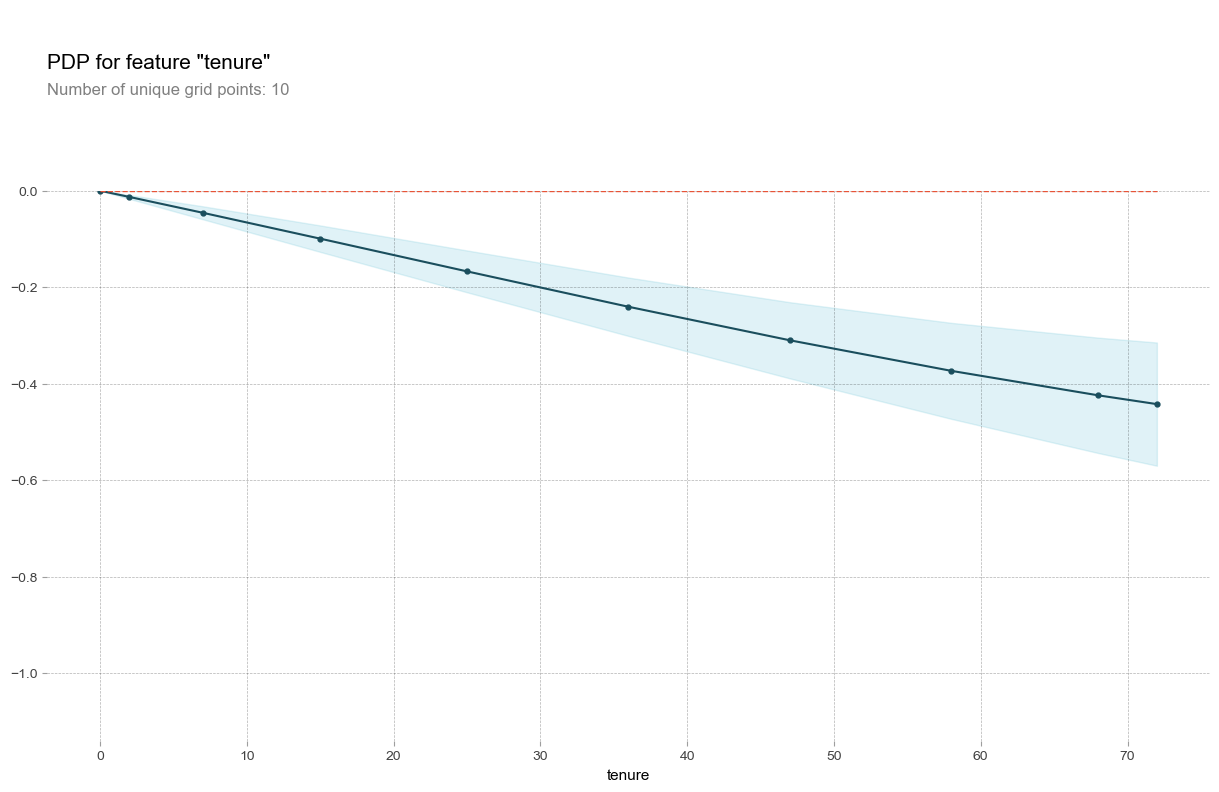

In [36]:
feature = sorted(p_i, key=lambda x: x[1], reverse=True)[0][0]
model = LR_model.named_steps['LR']

pdp_isolated = get_pdp_isolated(X_test, model, feature)
pdp_plot(pdp_isolated, feature_name=feature)

In [37]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

def get_pdp_interaction(dataset, model, features):
    pdp_interaction = pdp_interact(
        model = model,
        dataset = dataset,
        model_features = dataset.columns,
        features = features
    ) 

    return pdp_interaction

(<Figure size 750x950 with 3 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x14ccc4340>,
  'pdp_inter_ax': <matplotlib.axes._subplots.AxesSubplot at 0x14cc54eb0>})

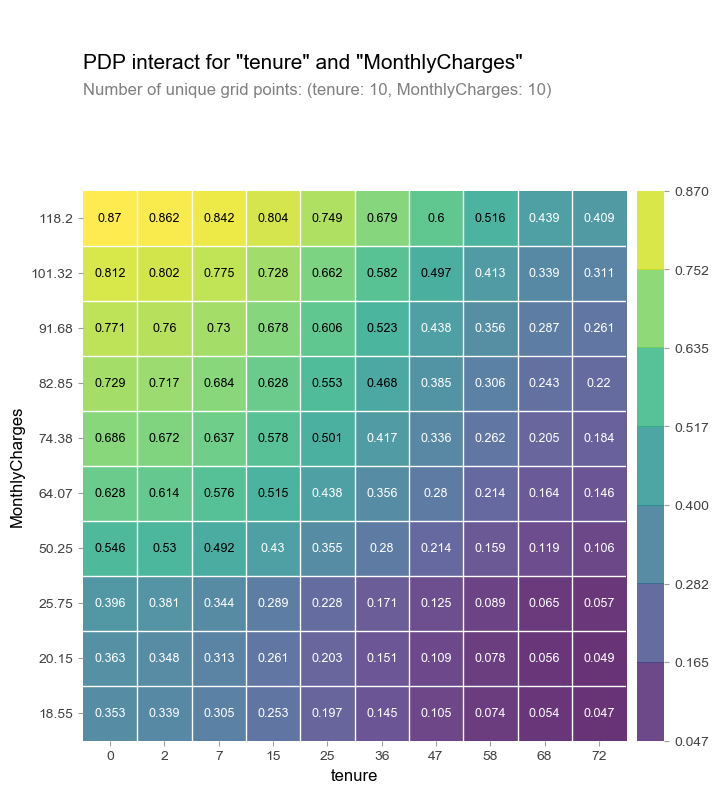

In [38]:
features = list(map(lambda x: x[0], sorted(p_i, key=lambda x: x[1], reverse=True)))[:2]
pdp_interaction = get_pdp_interaction(X_test, model, features)
pdp_interact_plot(pdp_interaction, feature_names=features, plot_type='grid')